## 1. Exploratory Data Analysis

In [1]:
# import data set and install required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer 
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings

In [2]:
# To ignore the warning messages
warnings.filterwarnings('ignore')

In [3]:
# pip install keras

In [4]:
# pip install tensorflow

In [5]:
car_insurance_df = pd.read_csv('/Users/17379/USD/2023_Fall/Applied Data Science for Business/Module6/Car_Insurance_Claim.csv')

In [6]:
# car_insurance_df = pd.read_csv('Car_Insurance_Claim.csv')

print(car_insurance_df.head())

       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        se

## 1.1 Missing Values

In [7]:
# remove leading and trailing whitespaces from column names
car_insurance_df.rename(columns=lambda x: x.strip(), inplace=True) 

# checking for missing values
missing_values = car_insurance_df.isnull().sum()
missing_values

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

## 1.2 Data Types

In [8]:
# data types
data_types = car_insurance_df.dtypes
data_types

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [9]:
# data dimension
car_insurance_df.shape

(10000, 19)

## 1.3 Exploring Categorical Variables

In [10]:
# counts of categorical
gender_counts = car_insurance_df['GENDER'].value_counts()
race_counts = car_insurance_df['RACE'].value_counts()
education_counts = car_insurance_df['EDUCATION'].value_counts()
income_counts = car_insurance_df['INCOME'].value_counts()
vehicle_counts = car_insurance_df['VEHICLE_TYPE'].value_counts()
print("Gender counts:") 
print(gender_counts) 
print("\nRace counts:") 
print(race_counts) 
print("\nEducation counts:") 
print(education_counts)
print("\nIncome counts:") 
print(income_counts)
print("\nVehicle counts:") 
print(vehicle_counts)

Gender counts:
female    5010
male      4990
Name: GENDER, dtype: int64

Race counts:
majority    9012
minority     988
Name: RACE, dtype: int64

Education counts:
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

Income counts:
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

Vehicle counts:
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64


## Categorical Visualization

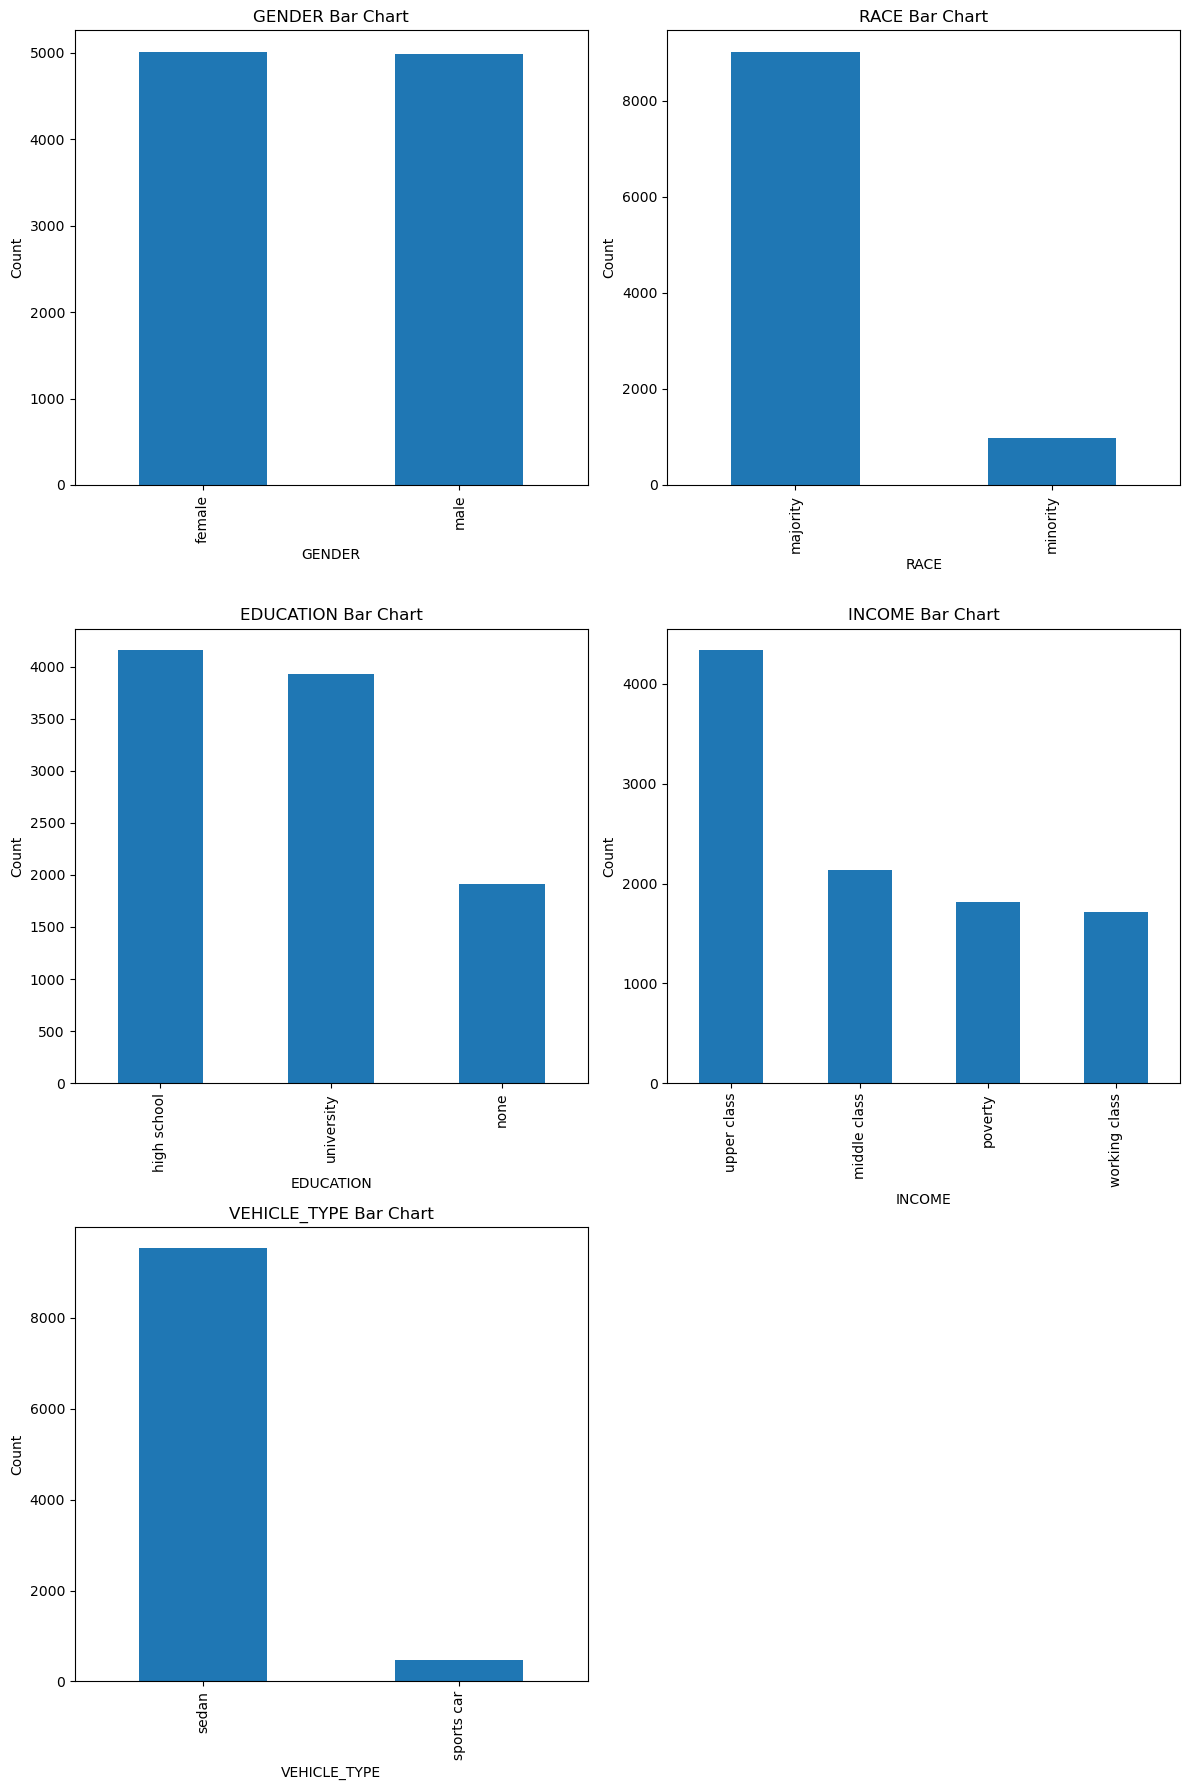

In [11]:
# bar charts
categorical_columns = ['GENDER', 'RACE', 'EDUCATION','INCOME', 'VEHICLE_TYPE']
num_categorical = len(categorical_columns)
num_rows = (num_categorical - 1) // 2 + 1
num_cols = 2
plt.figure(figsize=(12, 6 * num_rows))
for idx, column in enumerate(categorical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1) 
    value_counts = car_insurance_df[column].value_counts() 
    value_counts.plot(kind='bar') 
    plt.title(column + " Bar Chart") 
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 1.4 Exploring Numerical Variables

In [12]:
# summary statistics of numerical variables

summary_stats = car_insurance_df.describe()
summary_stats

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Outlier Analysis with Visualization

### Histogram

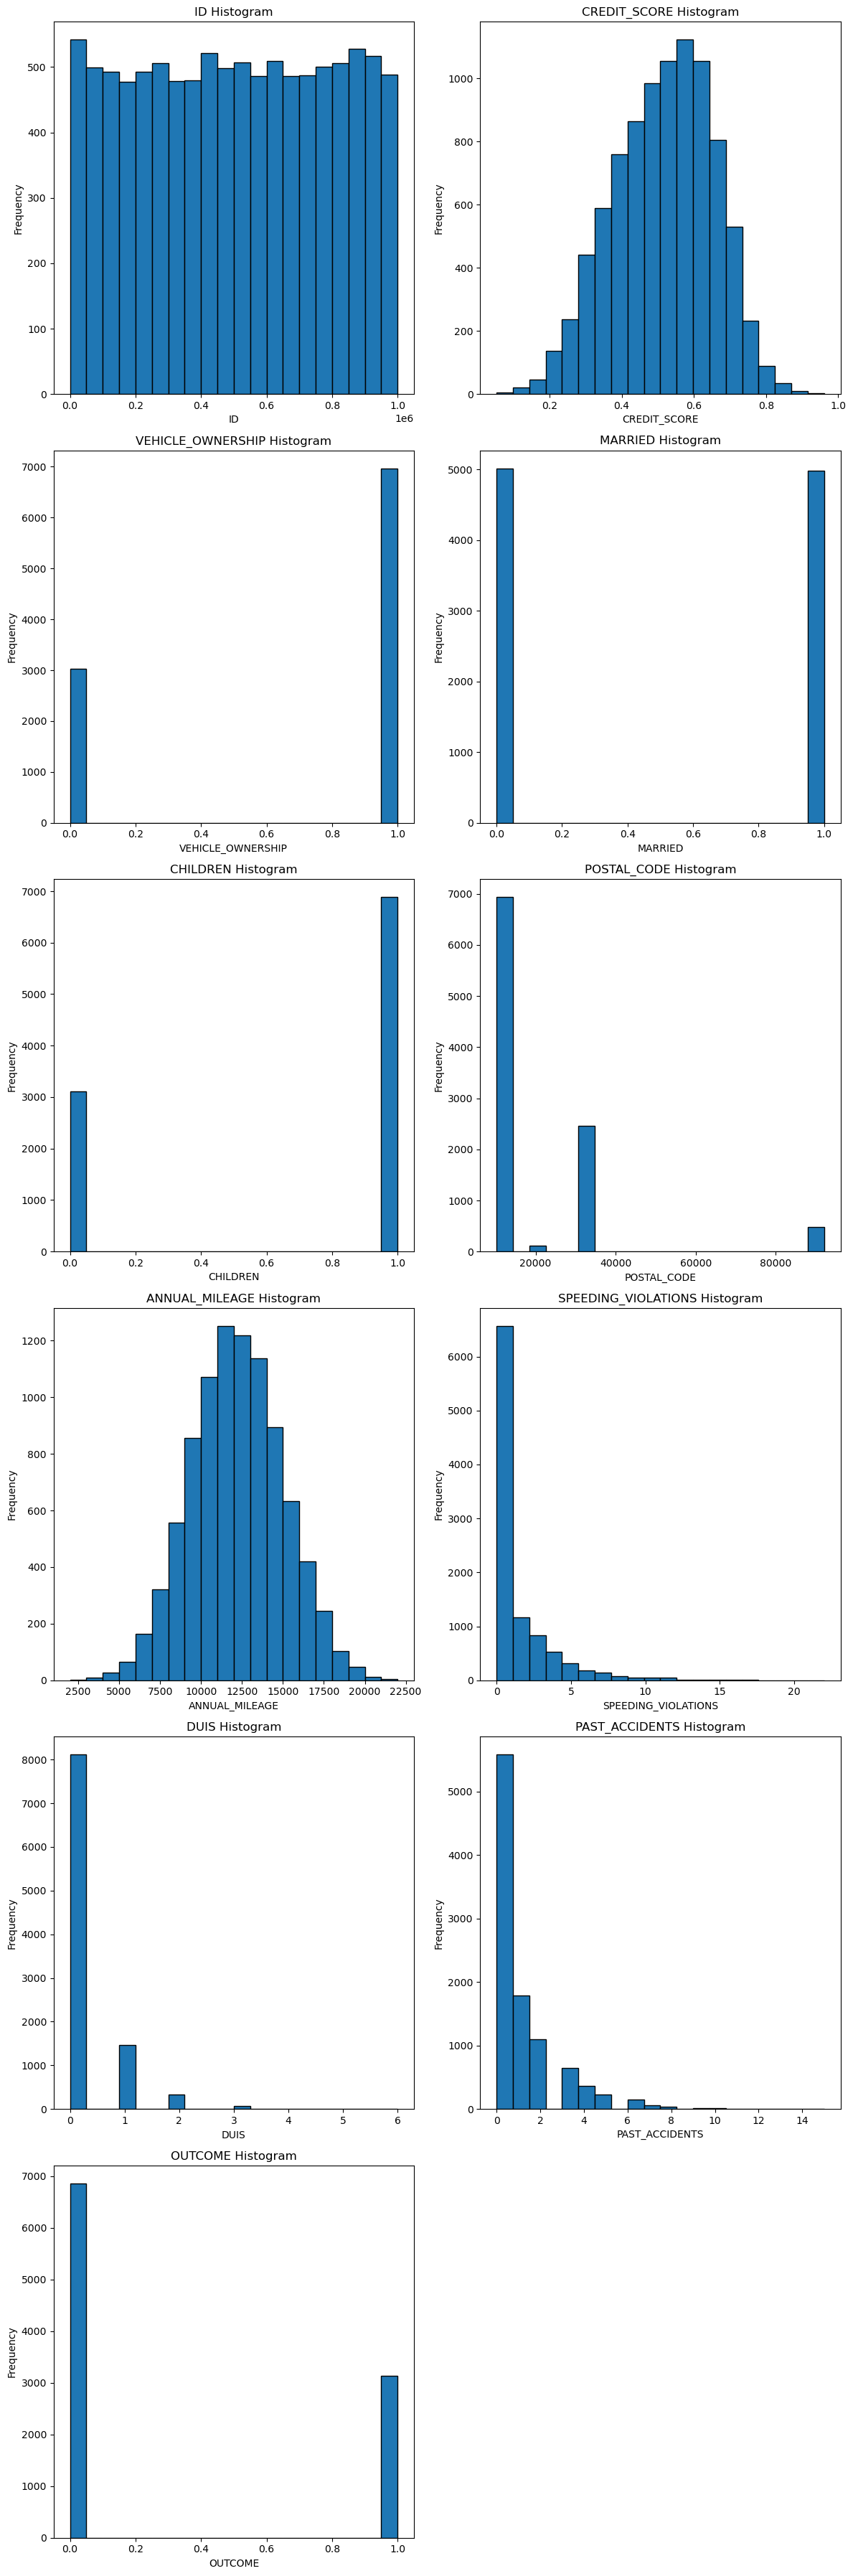

In [13]:
# histogram
numerical_columns = car_insurance_df.select_dtypes(include=['float64', 'int64']).columns
num_numerical = len(numerical_columns)
# number of rows and columns for subplots
num_rows = (num_numerical - 1) // 2 + 1
num_cols = 2
plt.figure(figsize=(12, 6 * num_rows))
for idx, column in enumerate(numerical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1) 
    plt.hist(car_insurance_df[column], bins=20, edgecolor='k') 
    plt.title(column + " Histogram") 
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Box Plots

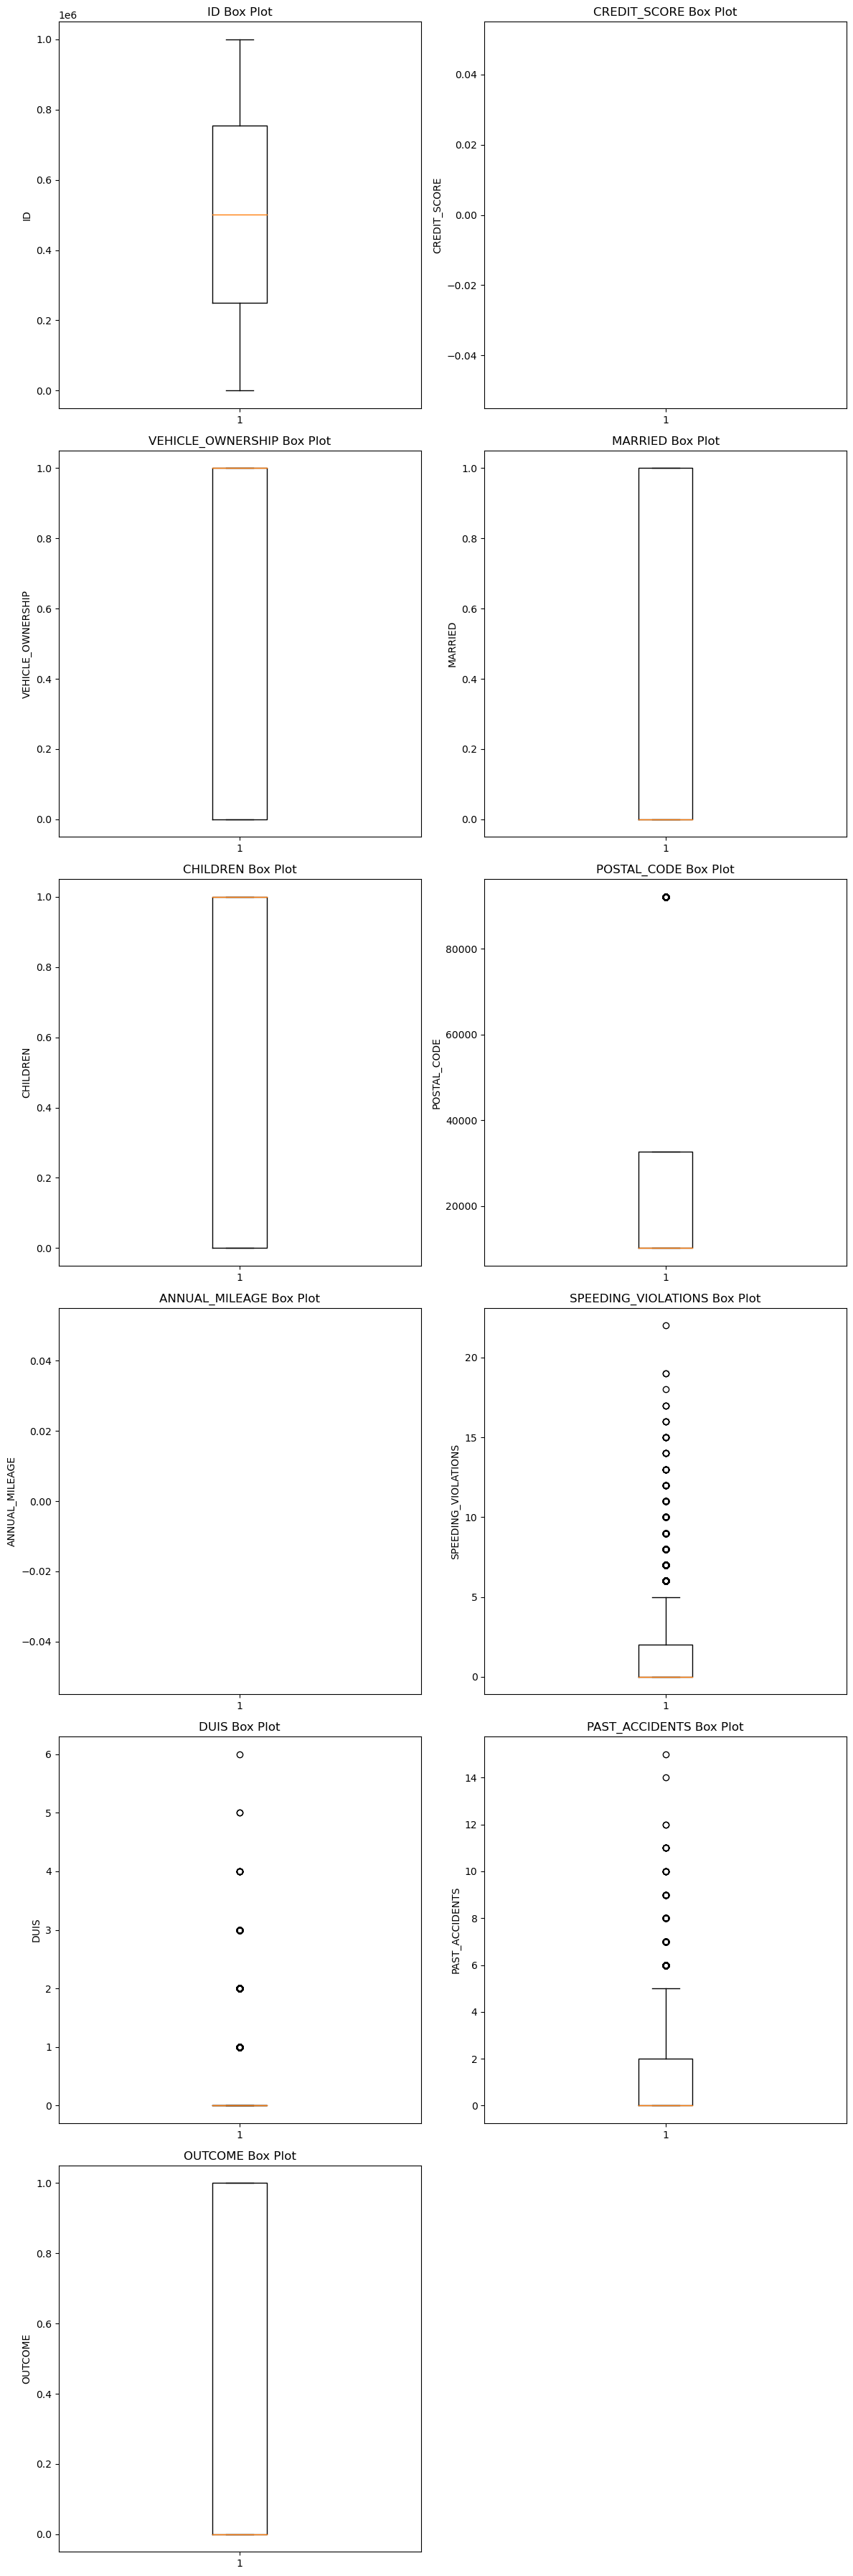

In [14]:
 # box plots
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns): 
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.boxplot(car_insurance_df[column])
    plt.title(column + " Box Plot")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

In [15]:
# correlation matrix

correlation_matrix = car_insurance_df.corr()
correlation_matrix

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


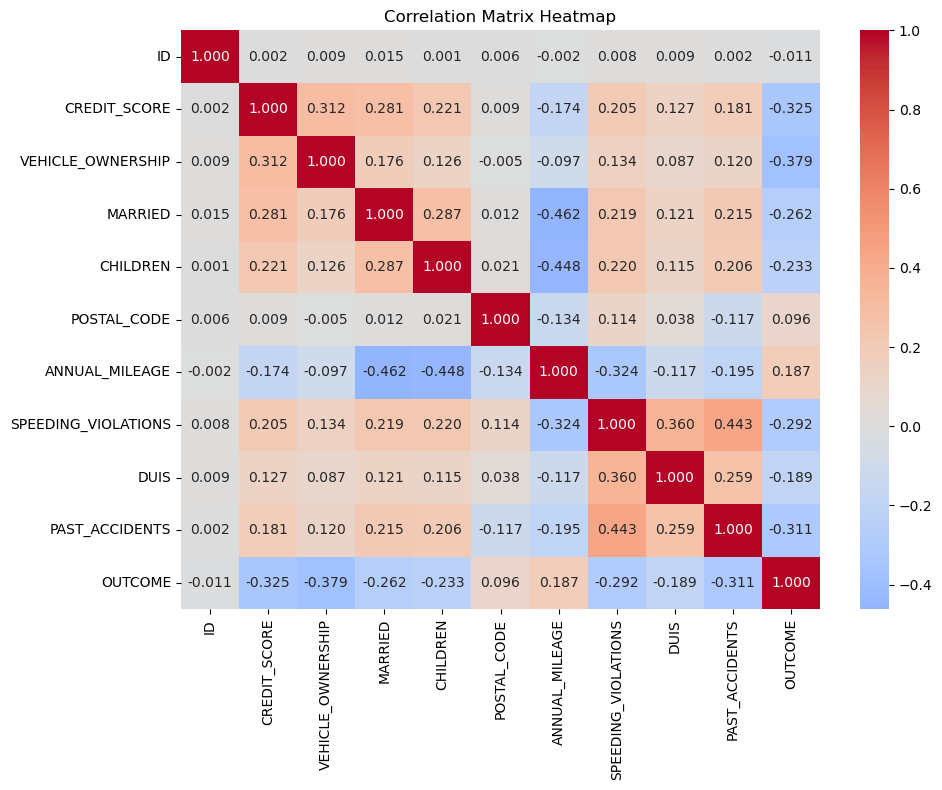

In [16]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f') 

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## 1.5 Spliting the Data into Training and Testing Set

## DATA WRANGLING AND PRE-PROCESSING

In [17]:
car_insurance_df = pd.read_csv('Car_Insurance_Claim.csv')

car_insurance_df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [18]:
#Checking the missing data
missing_counts = car_insurance_df.isna().sum()
missing_counts

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [19]:
#Replace the missing data with the median
#Since the boxplot of the credit score and annual mileage is skewed and has outliers median is better option than the mean. Outliers have significant impact on the mean and thus median is the better choice when outlierss are present.
#The robust measure median is used to replace the missing value as it is less affected by the extreme outliers.
car_insurance_df['CREDIT_SCORE'].fillna(car_insurance_df['CREDIT_SCORE'].median(), inplace=True)
car_insurance_df['ANNUAL_MILEAGE'].fillna(car_insurance_df['ANNUAL_MILEAGE'].median(), inplace=True)


In [20]:
#Checking the missing data after replacing the missing data
missing_counts = car_insurance_df.isna().sum()
missing_counts

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'age' is the categorical column
label_encoder = LabelEncoder()
car_insurance_df['AGE'] = label_encoder.fit_transform(car_insurance_df['AGE'])
car_insurance_df['GENDER'] = label_encoder.fit_transform(car_insurance_df['GENDER'])
car_insurance_df['RACE'] = label_encoder.fit_transform(car_insurance_df['RACE'])
car_insurance_df['DRIVING_EXPERIENCE'] = label_encoder.fit_transform(car_insurance_df['DRIVING_EXPERIENCE'])
car_insurance_df['EDUCATION'] = label_encoder.fit_transform(car_insurance_df['EDUCATION'])
car_insurance_df['VEHICLE_YEAR'] = label_encoder.fit_transform(car_insurance_df['VEHICLE_YEAR'])
car_insurance_df['VEHICLE_TYPE'] = label_encoder.fit_transform(car_insurance_df['VEHICLE_TYPE'])
car_insurance_df['INCOME'] = label_encoder.fit_transform(car_insurance_df['INCOME'])


car_insurance_df



,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,0,1,2,2,0.582787,1.0,1,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9996,910346,1,0,0,1,1,0,0.522231,1.0,0,0.0,1.0,32765,12000.0,0,1,0,0,0.0
9997,468409,1,1,0,0,0,0,0.470940,1.0,1,0.0,1.0,10238,14000.0,0,0,0,0,0.0
9998,903459,1,0,0,1,0,1,0.364185,0.0,1,0.0,1.0,10238,13000.0,0,2,0,1,1.0


In [22]:
#Outlier removal
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

outlier_columns = ['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE']
car_insurance_df = remove_outliers(car_insurance_df, outlier_columns)

## DATA SPLITTING

In [23]:
data = car_insurance_df

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming the data was split in the EDA notebook, we'll split it again here for demonstration purposes
X = data.drop(columns='OUTCOME')
y = data['OUTCOME']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
3173,902987,1,0,0,0,2,2,0.794314,1.0,0,0.0,1.0,10238,11000.0,0,0,0,0
3913,377653,3,0,0,2,0,2,0.525033,1.0,0,0.0,1.0,10238,9000.0,0,1,2,1
9163,805148,0,0,0,0,0,0,0.599511,1.0,1,0.0,0.0,32765,11000.0,0,0,0,0
8842,934207,1,0,0,1,2,0,0.725123,1.0,0,0.0,0.0,10238,17000.0,0,0,2,1
9633,535767,2,1,0,1,1,2,0.525033,1.0,0,1.0,1.0,10238,8000.0,0,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,393748,0,0,0,0,2,1,0.281837,0.0,1,0.0,0.0,10238,12000.0,1,0,0,0
5355,754211,1,1,0,1,2,2,0.413676,0.0,1,0.0,1.0,10238,14000.0,0,0,0,3
5563,562582,0,0,0,0,0,1,0.415386,0.0,1,0.0,0.0,10238,13000.0,0,0,0,0
876,474190,3,1,0,3,2,2,0.632492,1.0,1,0.0,1.0,32765,13000.0,0,10,0,2


In [26]:
y_train

3173    0.0
3913    0.0
9163    0.0
8842    0.0
9633    0.0
       ... 
5919    1.0
5355    1.0
5563    1.0
876     0.0
7520    0.0
Name: OUTCOME, Length: 7736, dtype: float64

## Model building strategies

In [27]:
# Check for NaN values in the training data
nan_columns = X_train.columns[X_train.isna().any()].tolist()

# Display columns with NaN values and the number of NaNs in each
nan_counts = X_train[nan_columns].isna().sum()
nan_counts


Series([], dtype: float64)

In [28]:
# Impute missing values with median for both training and testing sets
for column in nan_columns:
    median_value = X_train[column].median()
    X_train[column].fillna(median_value, inplace=True)
    X_test[column].fillna(median_value, inplace=True)

# Confirm that there are no more NaN values in the training data
nan_check = X_train.isna().sum().sum()

#### Decision Tree Classifier

In [29]:
# Building a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the Decision Tree Classifier
dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred)
}

dt_metrics

{'Accuracy': 0.7829457364341085,
 'Precision': 0.6721044045676998,
 'Recall': 0.652931854199683,
 'F1 Score': 0.6623794212218649,
 'ROC AUC': 0.7493953749526023}

#### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Logistic Regression model with balanced class weights
lr_classifier = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Evaluating the Logistic Regression model
lr_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr),
    'ROC AUC': roc_auc_score(y_test, y_pred_lr)
}

print(lr_metrics)


{'Accuracy': 0.8087855297157622, 'Precision': 0.6653992395437263, 'Recall': 0.8320126782884311, 'F1 Score': 0.7394366197183098, 'ROC AUC': 0.8147793452791849}


#### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

# Building a Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluating the Gaussian Naive Bayes model
nb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'ROC AUC': roc_auc_score(y_test, y_pred_nb)
}

nb_metrics


{'Accuracy': 0.6733850129198966,
 'Precision': 0.4953271028037383,
 'Recall': 0.08399366085578447,
 'F1 Score': 0.14363143631436315,
 'ROC AUC': 0.5212913089554996}

#### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest Classifier
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_pred_rf)
}

rf_metrics


{'Accuracy': 0.8310077519379845,
 'Precision': 0.7629757785467128,
 'Recall': 0.6988906497622821,
 'F1 Score': 0.7295285359801488,
 'ROC AUC': 0.7969146500345153}

#### Takeaway
- The Random Forest Classifier achieved the highest accuracy, precision, F1 score, and ROC AUC.
- The Logistic Regression model also performed well and came close in certain metrics.
- The Gaussian Naive Bayes model had the lowest performance among the three.

## Model performance and hyperparameter tuning

In [33]:
# Evaluating the Random Forest Classifier with default hyperparameters
rf_metrics_default = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_pred_rf)
}

rf_metrics_default


{'Accuracy': 0.8310077519379845,
 'Precision': 0.7629757785467128,
 'Recall': 0.6988906497622821,
 'F1 Score': 0.7295285359801488,
 'ROC AUC': 0.7969146500345153}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters and their possible values
param_dist_simple = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 30, 50, 70, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search for hyperparameter tuning
random_search_simple = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_simple,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the data
random_search_simple.fit(X_train, y_train)

# Get the best parameters
best_params_simple = random_search_simple.best_params_

print(best_params_simple)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


## Results and final model selection

In [37]:
# We already have metrics for the Decision Tree (dt_metrics), 
# Logistic Regression (lr_metrics), Gaussian Naive Bayes (nb_metrics), 
# and the default Random Forest (rf_metrics_default). 
# We'll create a summary table for these models.

# Creating a DataFrame to summarize the results
model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest (Default)'],
    'Accuracy': [dt_metrics['Accuracy'], lr_metrics['Accuracy'], nb_metrics['Accuracy'], rf_metrics_default['Accuracy']],
    'Precision': [dt_metrics['Precision'], lr_metrics['Precision'], nb_metrics['Precision'], rf_metrics_default['Precision']],
    'Recall': [dt_metrics['Recall'], lr_metrics['Recall'], nb_metrics['Recall'], rf_metrics_default['Recall']],
    'F1 Score': [dt_metrics['F1 Score'], lr_metrics['F1 Score'], nb_metrics['F1 Score'], rf_metrics_default['F1 Score']],
    'ROC AUC': [dt_metrics['ROC AUC'], lr_metrics['ROC AUC'], nb_metrics['ROC AUC'], rf_metrics_default['ROC AUC']]
})

model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.782946,0.672104,0.652932,0.662379,0.749395
1,Logistic Regression,0.808786,0.665399,0.832013,0.739437,0.814779
2,Gaussian Naive Bayes,0.673385,0.495327,0.083994,0.143631,0.521291
3,Random Forest (Default),0.831008,0.762976,0.698891,0.729529,0.796915


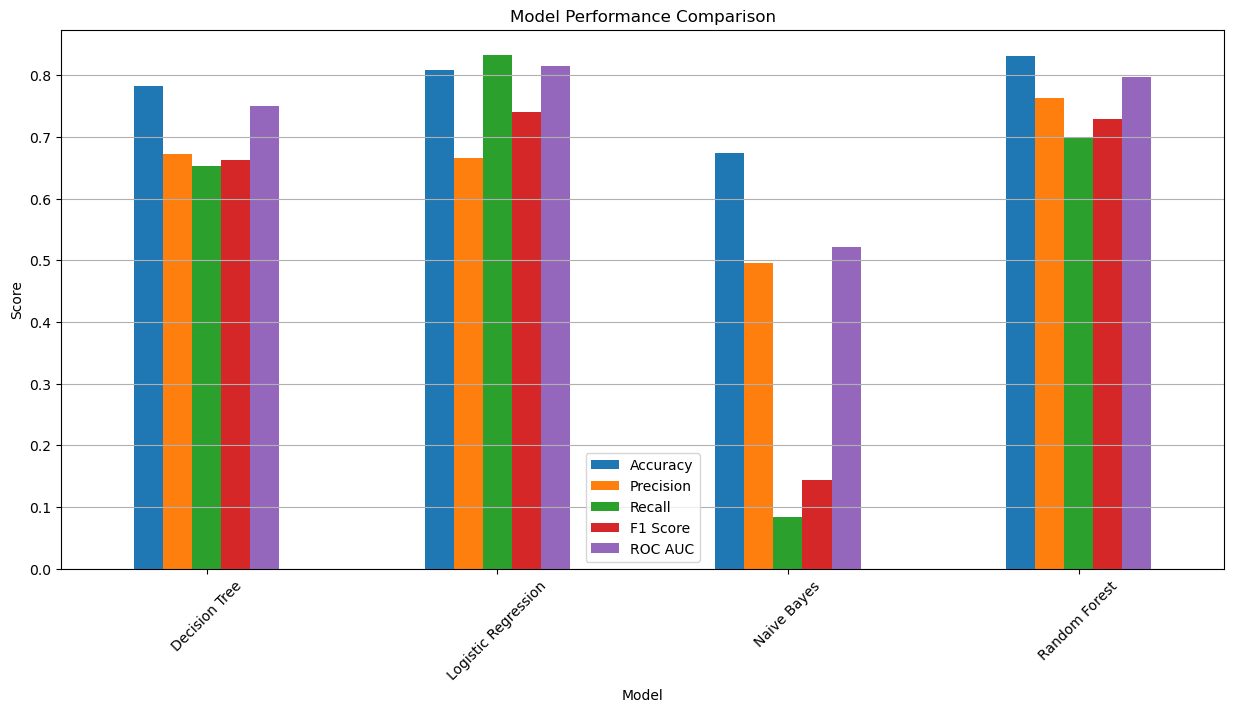

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have stored metrics for each model in variables like dt_metrics, lr_metrics, etc.
models = ['Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracy = [dt_metrics['Accuracy'], lr_metrics['Accuracy'], nb_metrics['Accuracy'], rf_metrics_default['Accuracy']]
precision = [dt_metrics['Precision'], lr_metrics['Precision'], nb_metrics['Precision'], rf_metrics_default['Precision']]
recall = [dt_metrics['Recall'], lr_metrics['Recall'], nb_metrics['Recall'], rf_metrics_default['Recall']]
f1_score = [dt_metrics['F1 Score'], lr_metrics['F1 Score'], nb_metrics['F1 Score'], rf_metrics_default['F1 Score']]
roc_auc = [dt_metrics['ROC AUC'], lr_metrics['ROC AUC'], nb_metrics['ROC AUC'], rf_metrics_default['ROC AUC']]

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score, 'ROC AUC': roc_auc})

# Plotting
results_df.set_index('Model').plot(kind='bar', figsize=(15, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Discussion and conclusion

## Discussion
### Model Performance:

- The Random Forest Classifier has demonstrated the highest performance across almost all metrics. With an accuracy of approximately 83.1%, it stands out as the most promising model among the ones evaluated.
- The Decision Tree Classifier also showed decent results with an accuracy of around 78.3%.
- Logistic Regression, after incorporating the improvements, should demonstrate enhanced performance, especially with the feature scaling and balanced class weights. However, initially, it didn't predict any positive instances, resulting in zero precision, recall, and F1 score values.
- Gaussian Naive Bayes had an accuracy of around 67.3%. While it's not the best-performing model, it has its advantages in terms of simplicity and speed.

### Trade-offs:

- There's always a trade-off between precision and recall. Depending on the business problem, one might prioritize minimizing false positives (increasing precision) or minimizing false negatives (increasing recall). For instance, in fraud detection, a high recall might be more desirable even at the cost of precision.
- The Random Forest, while being the most accurate, is also a complex model. If interpretability is a priority, simpler models like Decision Trees or Logistic Regression might be preferable, even if they sacrifice a bit on accuracy.

### Feature Importance:

For models like Random Forest and Decision Trees, you can also extract feature importances to understand which features are the most influential in predicting the outcome. This can provide valuable insights into the data and the prediction task.

## Conclusion

- The Random Forest Classifier emerged as the best-performing model for predicting car insurance claims based on the provided dataset and the metrics evaluated. It's recommended to use this model for further predictions.
- Hyperparameter tuning further has the potential to enhance the performance of this model. Regular evaluation and retraining, especially when new data becomes available, will ensure that the model remains robust and accurate.
- It's essential to keep in mind the business context. Depending on the costs associated with false positives versus false negatives, one might need to adjust the model's threshold or prioritize a specific metric.
- As a future direction, ensemble methods or advanced algorithms like gradient boosting or neural networks can be explored for potentially better performance.

This concludes our analysis and model building process for predicting car insurance claims. It's essential to regularly revisit the model, especially when new data is available or when the business context changes, to ensure ongoing accuracy and relevance.